![logo_ironhack_blue 7](https://user-images.githubusercontent.com/23629340/40541063-a07a0a8a-601a-11e8-91b5-2f13e4e6b441.png)

# Lab | Making predictions with logistic regression

In this lab, you will be using the [Sakila](https://dev.mysql.com/doc/sakila/en/) database of movie rentals.

In order to optimize our inventory, we would like to know which films will be rented. We are asked to create a model to predict it. So we use the information we have from May 2005 to create the model.

### Instructions

1. Create a query or queries to extract the information you think may be relevant for building the prediction model. It should include some film features and some rental features (X). 
2. Create a query to get the list of all unique film titles and a boolean indicating if it was rented (rental_date) in May 2005. (Create new column called - 'rented_in_may'). This will be our **TARGET** (y) variable.
3. Read the data into a Pandas dataframe.  At this point you should have 1000 rows.  Number of columns depends on the number of features you chose.
4. Analyze extracted features (X) and transform them. You may need to encode some categorical variables, or scale numerical variables.
5. Create a logistic regression model to predict 'rented_in_may' from the cleaned data.
6. Evaluate the results.

In [54]:
#imports
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import getpass  # To get the password without showing the input
import matplotlib.pyplot as plt
import seaborn as sns
password = getpass.getpass()

········


In [55]:
# get the sakila data
connection_string = 'mysql+pymysql://root:' + password + '@localhost/sakila'
engine = create_engine(connection_string)
query = '''SELECT
    film.*,
    MAX(CASE WHEN rental.rental_date IS NOT NULL THEN 1 ELSE 0 END) AS rented_in_may
FROM
    film
LEFT JOIN
    inventory ON film.film_id = inventory.film_id
LEFT JOIN
    rental ON inventory.inventory_id = rental.inventory_id AND EXTRACT(MONTH FROM rental.rental_date) = 5 AND EXTRACT(YEAR FROM rental.rental_date) = 2005
GROUP BY
    film.film_id, film.rental_rate, film.length, film.rating'''

data = pd.read_sql_query(query, engine)
data

,film_id,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update,rented_in_may
0,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,None,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",2006-02-15 05:03:42,1
1,2,ACE GOLDFINGER,A Astounding Epistle of a Database Administrat...,2006,1,None,3,4.99,48,12.99,G,"Trailers,Deleted Scenes",2006-02-15 05:03:42,0
2,3,ADAPTATION HOLES,A Astounding Reflection of a Lumberjack And a ...,2006,1,None,7,2.99,50,18.99,NC-17,"Trailers,Deleted Scenes",2006-02-15 05:03:42,1
3,4,AFFAIR PREJUDICE,A Fanciful Documentary of a Frisbee And a Lumb...,2006,1,None,5,2.99,117,26.99,G,"Commentaries,Behind the Scenes",2006-02-15 05:03:42,1
4,5,AFRICAN EGG,A Fast-Paced Documentary of a Pastry Chef And ...,2006,1,None,6,2.99,130,22.99,G,Deleted Scenes,2006-02-15 05:03:42,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,YOUNG LANGUAGE,A Unbelieveable Yarn of a Boat And a Database ...,2006,1,None,6,0.99,183,9.99,G,"Trailers,Behind the Scenes",2006-02-15 05:03:42,0
996,997,YOUTH KICK,A Touching Drama of a Teacher And a Cat who mu...,2006,1,None,4,0.99,179,14.99,NC-17,"Trailers,Behind the Scenes",2006-02-15 05:03:42,0
997,998,ZHIVAGO CORE,A Fateful Yarn of a Composer And a Man who mus...,2006,1,None,6,0.99,105,10.99,NC-17,Deleted Scenes,2006-02-15 05:03:42,1
998,999,ZOOLANDER FICTION,A Fateful Reflection of a Waitress And a Boat ...,2006,1,None,5,2.99,101,28.99,R,"Trailers,Deleted Scenes",2006-02-15 05:03:42,1


In [56]:
data=data.drop(columns=["film_id","description","last_update","language_id","original_language_id","special_features","release_year"])
data

# we first dropped "obvious"columns like film id ,description and last update
#then we dropped language_id because there is only 1 id and original_language_id because it only has none values
#we drop release year because all the movies have been released on the same year
#initially dropping special features,is not clear that it will be usefull and will give a lot of work,but we can always readd it in the future if needed.

,title,rental_duration,rental_rate,length,replacement_cost,rating,rented_in_may
0,ACADEMY DINOSAUR,6,0.99,86,20.99,PG,1
1,ACE GOLDFINGER,3,4.99,48,12.99,G,0
2,ADAPTATION HOLES,7,2.99,50,18.99,NC-17,1
3,AFFAIR PREJUDICE,5,2.99,117,26.99,G,1
4,AFRICAN EGG,6,2.99,130,22.99,G,1
...,...,...,...,...,...,...,...
995,YOUNG LANGUAGE,6,0.99,183,9.99,G,0
996,YOUTH KICK,4,0.99,179,14.99,NC-17,0
997,ZHIVAGO CORE,6,0.99,105,10.99,NC-17,1
998,ZOOLANDER FICTION,5,2.99,101,28.99,R,1


In [57]:
#checking for nan values 
data.isna().sum()

title               0
rental_duration     0
rental_rate         0
length              0
replacement_cost    0
rating              0
rented_in_may       0
dtype: int64

C:\Users\Admin\AppData\Local\Temp\ipykernel_14968\3275982284.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=data.corr()  # default


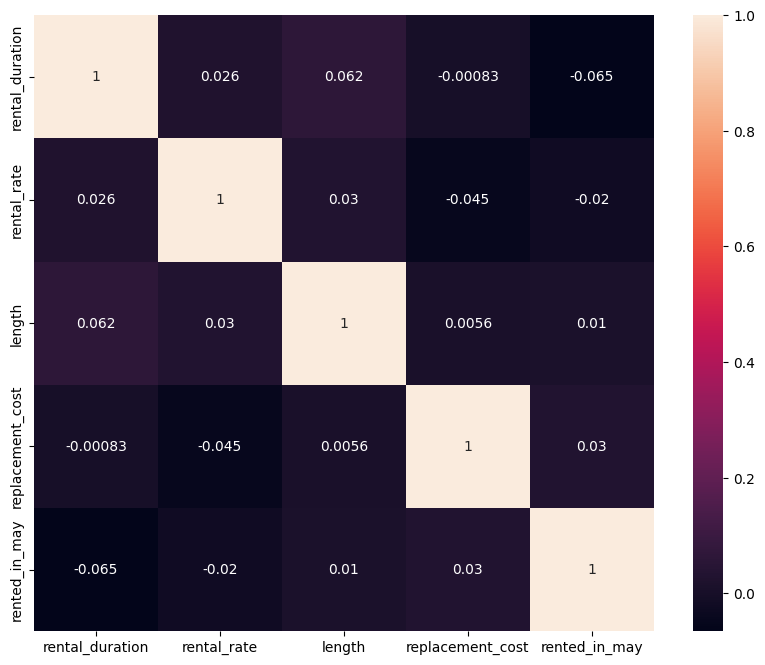

In [58]:
# checking for multicolinearity
corr_matrix=data.corr()  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [72]:
# removeing title from df because it will trigger too many columns when one hot encoding 
data=data.drop(columns=["title"])
# separate target from features
y = data['rented_in_may']
X = data.drop('rented_in_may', axis=1)

#separating numerical and categorical
X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = object)

#training test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1337)

In [73]:
data

,rental_duration,rental_rate,length,replacement_cost,rating,rented_in_may
0,6,0.99,86,20.99,PG,1
1,3,4.99,48,12.99,G,0
2,7,2.99,50,18.99,NC-17,1
3,5,2.99,117,26.99,G,1
4,6,2.99,130,22.99,G,1
...,...,...,...,...,...,...
995,6,0.99,183,9.99,G,0
996,4,0.99,179,14.99,NC-17,0
997,6,0.99,105,10.99,NC-17,1
998,5,2.99,101,28.99,R,1


In [74]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StandardScaler

X_train_num = X_train.select_dtypes(include = np.number)

# Scaling data
transformer = MinMaxScaler().fit(X_train_num) # need to keep transformer
X_train_normalized = transformer.transform(X_train_num)
X_train_norm = pd.DataFrame(X_train_normalized, columns=X_num.columns)
X_train_norm

,rental_duration,rental_rate,length,replacement_cost
0,0.50,1.0,0.769784,0.70
1,0.75,0.0,0.151079,0.65
2,0.00,0.5,0.258993,1.00
3,0.50,1.0,0.223022,0.70
4,0.25,0.0,0.733813,0.65
...,...,...,...,...
795,0.50,0.0,0.151079,0.70
796,0.00,0.0,0.683453,0.40
797,0.00,1.0,0.467626,0.15
798,0.50,1.0,0.906475,0.70


In [75]:
X_train_cat = X_train.select_dtypes(include = object)
X_test_cat  = X_test.select_dtypes(include = object)

In [81]:
# encode categoricals
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first').fit(X_train_cat)
encoded_cat = encoder.transform(X_train_cat).toarray()
cols = encoder.get_feature_names_out(input_features=X_train_cat.columns)
# we will reuse encoder and cols when encoding the X_test_cat
X_train_cat = pd.DataFrame(encoded_cat, columns=cols)
X_train_cat

,rating_NC-17,rating_PG,rating_PG-13,rating_R
0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0
...,...,...,...,...
795,0.0,0.0,0.0,1.0
796,0.0,1.0,0.0,0.0
797,0.0,0.0,0.0,1.0
798,1.0,0.0,0.0,0.0


In [85]:
X_train_transformed = np.concatenate([X_train_norm, X_train_cat], axis=1)
X_train_transformed

array([[0.5       , 1.        , 0.76978417, ..., 0.        , 0.        ,
        0.        ],
       [0.75      , 0.        , 0.15107914, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.5       , 0.25899281, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.        , 1.        , 0.4676259 , ..., 0.        , 0.        ,
        1.        ],
       [0.5       , 1.        , 0.90647482, ..., 0.        , 0.        ,
        0.        ],
       [0.5       , 0.5       , 0.31654676, ..., 0.        , 1.        ,
        0.        ]])

In [86]:
# now we are transforming our TEST data
# for numericals
X_test_num = X_test.select_dtypes(include = np.number)

# Scaling data
# we use the transformer that was trained on the training data
X_test_normalized = transformer.transform(X_test_num)
X_test_norm = pd.DataFrame(X_test_normalized,columns = X_test_num.columns)
X_test_norm.head()

,rental_duration,rental_rate,length,replacement_cost
0,0.00,0.0,0.374101,0.15
1,0.75,0.5,0.964029,0.70
2,0.25,0.5,0.316547,0.45
3,1.00,0.5,0.618705,0.30
4,0.25,0.0,0.453237,0.35


In [87]:
# onehot encoding reusing the transformer for the test data 
encoded_cat = encoder.transform(X_test_cat).toarray()
cols = encoder.get_feature_names_out(input_features=X_test_cat.columns)
X_test_cat = pd.DataFrame(encoded_cat, columns=cols)
X_test_cat

,rating_NC-17,rating_PG,rating_PG-13,rating_R
0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0
...,...,...,...,...
195,0.0,0.0,0.0,0.0
196,0.0,0.0,0.0,1.0
197,1.0,0.0,0.0,0.0
198,1.0,0.0,0.0,0.0


In [89]:
X_test_transformed = np.concatenate([X_test_norm, X_test_cat], axis=1)
X_test_transformed

array([[0.        , 0.        , 0.37410072, ..., 0.        , 0.        ,
        1.        ],
       [0.75      , 0.5       , 0.96402878, ..., 0.        , 0.        ,
        0.        ],
       [0.25      , 0.5       , 0.31654676, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [1.        , 0.5       , 0.27338129, ..., 0.        , 0.        ,
        0.        ],
       [0.25      , 0.        , 0.29496403, ..., 0.        , 0.        ,
        0.        ],
       [0.5       , 1.        , 0.4028777 , ..., 0.        , 0.        ,
        1.        ]])

In [95]:
# Building the logistic regression model
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression(random_state=0, solver='saga',
                  multi_class='multinomial').fit(X_train_transformed, y_train)

In [96]:
# PREDICTIONS TIME!!!!
predictions = classification.predict(X_test_transformed)
predictions
classification.score(X_test_transformed, y_test)

0.69

In [98]:
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [99]:
#there is some imbalance in the data 
print(y_test.value_counts())

1    138
0     62
Name: rented_in_may, dtype: int64


In [97]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[  0,  62],
       [  0, 138]], dtype=int64)

In [100]:
pd.Series(predictions).value_counts()

1    200
dtype: int64

In [113]:
# just for fun
from sklearn import neighbors
clf = neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform')
clf.fit(X_train_transformed, y_train)


KNeighborsClassifier()

In [114]:
predictions_clf = clf.predict(X_test_transformed)
clf.score(X_test_transformed, y_test)

0.605

## CONCLUSION

The conclusion is that we have a decent model ,it can be improved maybe with better features ,but it feels like we will lack some data 

Maybe with a bigger dataframe and some knowleadge about imbalanced results to refine that part.
